In [55]:
!pip install pyspark

# **Bibliotecas**

In [56]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.functions import vector_to_array

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
import numpy as np


# **Importacao dos dados:**

In [57]:
spark = SparkSession.builder \
    .appName("PCA_Spotify") \
    .getOrCreate()

In [58]:
df = spark.read.csv("spotify_songs.csv", header=True, inferSchema=True)

# **Visualização**

In [59]:
df.show()

+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|            track_id|          track_name|    track_artist|track_popularity|      track_album_id|    track_album_name|track_album_release_date|playlist_name|         playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|
+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|6f807x0im

Visualização das variaveis em pandas

In [60]:
df_pd = df.toPandas()
df_pd.head(5)
#Visualização em pandas que é melhor

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [61]:
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true)


In [62]:
df = df.withColumn("danceability", col("danceability").cast("double")) \
       .withColumn("energy", col("energy").cast("double")) \
       .withColumn("loudness", col("loudness").cast("double")) \
       .withColumn("key", col("key").cast("int")) \
       .withColumn("mode", col("mode").cast("int"))
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true

### **Graficos de Correlação entre todas as variaveis metricas**

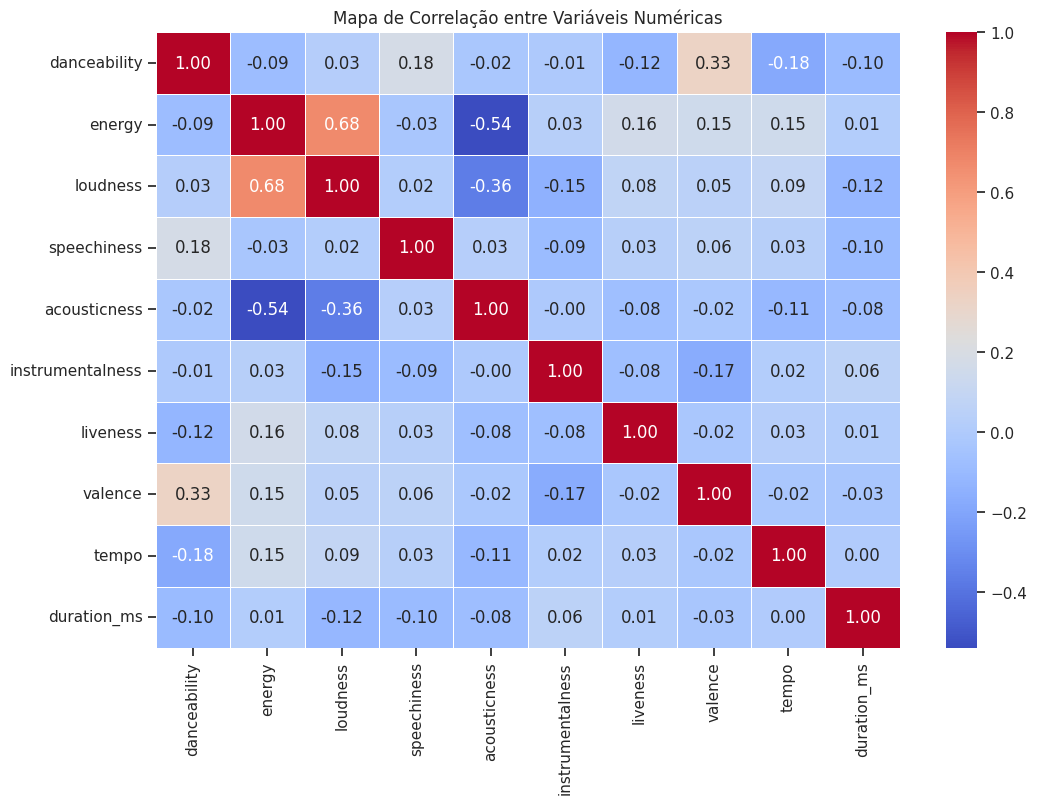

In [63]:
#Definiçao das variaveis numericas
numeric_cols = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]
df_numerico = df.select(*numeric_cols)
df_pandas = df_numerico.toPandas()

# Calcular a matriz de correlação
correlation_matrix = df_pandas.corr()

# Gerar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


| Variável                        | Significado                                     |
| ------------------------------- | ----------------------------------------------- |
| **track\_id**                   | ID único da faixa no Spotify.                   |
| **track\_name**                 | Nome da música.                                 |
| **track\_artist**               | Nome do(a) artista.                             |
| **track\_popularity**           | Popularidade da música no Spotify (0 a 100).    |
| **track\_album\_id**            | ID do álbum no Spotify.                         |
| **track\_album\_name**          | Nome do álbum.                                  |
| **track\_album\_release\_date** | Data de lançamento do álbum.                    |
| **playlist\_name**              | Nome da playlist de onde a música foi coletada. |
| **playlist\_id**                | ID da playlist.                                 |
| **playlist\_genre**             | Gênero musical da playlist.                     |
| **playlist\_subgenre**          | Subgênero musical da playlist.                  |
| **danceability**     | Quão dançante é a música. Varia de 0.0 (menos dançante) a 1.0 (mais dançante). Baseado em tempo, ritmo, estabilidade e força do beat. |
| **energy**           | Intensidade e atividade perceptível. Varia de 0.0 (calma) a 1.0 (intensa).                                                            |
| **key**              | Tom musical da música (0 a 11, onde 0 = C, 1 = C♯/D♭, ..., 11 = B).                                                                   |
| **loudness**         | Volume médio da música em decibéis (dB). Valores negativos: -60 (silenciosa) a 0 (alta).                                              |
| **mode**             | Modalidade: 1 = maior, 0 = menor.                                                                                                     |
| **speechiness**      | Presença de palavras faladas. 1.0 = fala pura; 0.0 = nenhuma fala.                                                                    |
| **acousticness**     | Probabilidade de a faixa ser acústica. Valores próximos de 1.0 indicam alta chance.                                                   |
| **instrumentalness** | Indica ausência de vocais. Quanto mais próximo de 1.0, mais instrumental.                                                             |
| **liveness**         | Indica presença de público ao vivo. Valores altos indicam show ao vivo.                                                               |
| **valence**          | Positividade/alegria da música. 1.0 = muito feliz, 0.0 = triste/melancólica.                                                          |
| **tempo**            | Tempo da música em batidas por minuto (BPM).                                                                                          |
| **duration\_ms**     | Duração da música em milissegundos.                                                                                                                           |



# Verificação de dados faltantes

In [64]:
valores_faltantes = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
valores_faltantes.show()
#Não tem nenhum valor faltante na tabela

+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|track_id|track_name|track_artist|track_popularity|track_album_id|track_album_name|track_album_release_date|playlist_name|playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|
+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|       0|         0|           0|               0|             0|               0|                       0|            0|          0|             0|  

## Verificar se a linhas duplicadas

In [65]:
duplicatas = df.count() - df.dropDuplicates().count()
print(f"Número de linhas duplicadas: {duplicatas}")
#Não a linhas inteiras duplicadas tambem

Número de linhas duplicadas: 0


# Plot de graficos para visualização da distribuicao dos dados em cada variavel


**track_popularity**

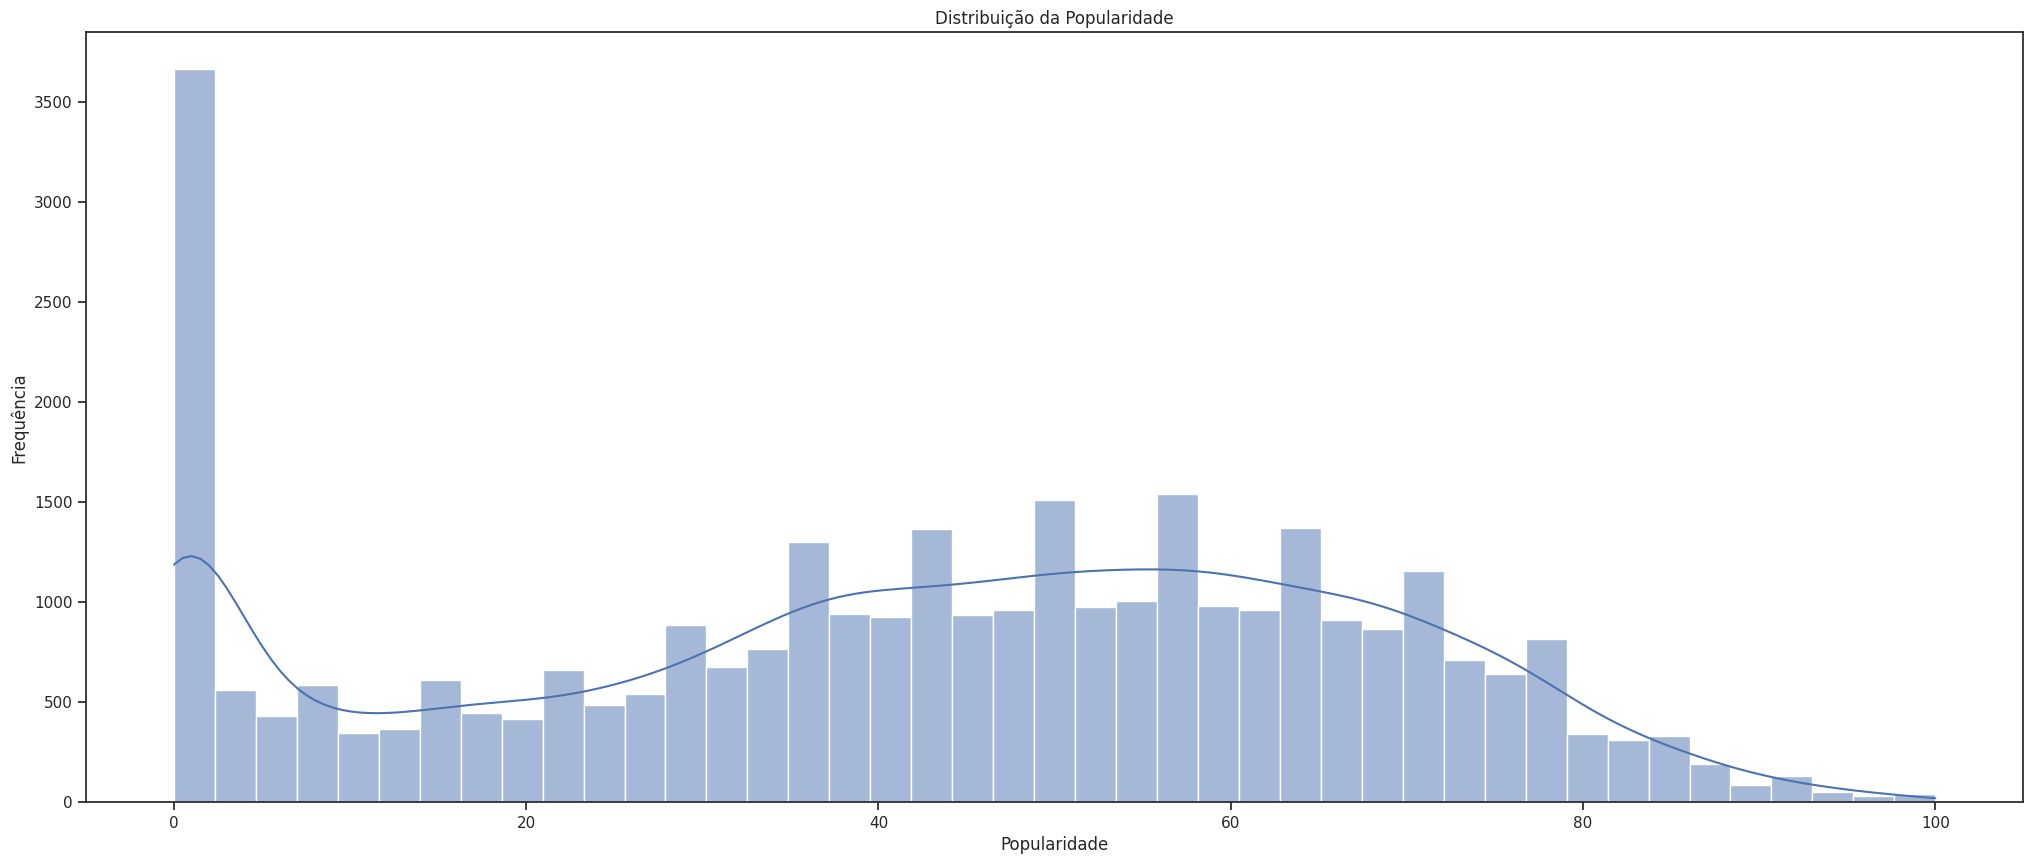

In [66]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['track_popularity'], kde=True)
plt.title("Distribuição da Popularidade")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")
plt.show()

**speechiness**

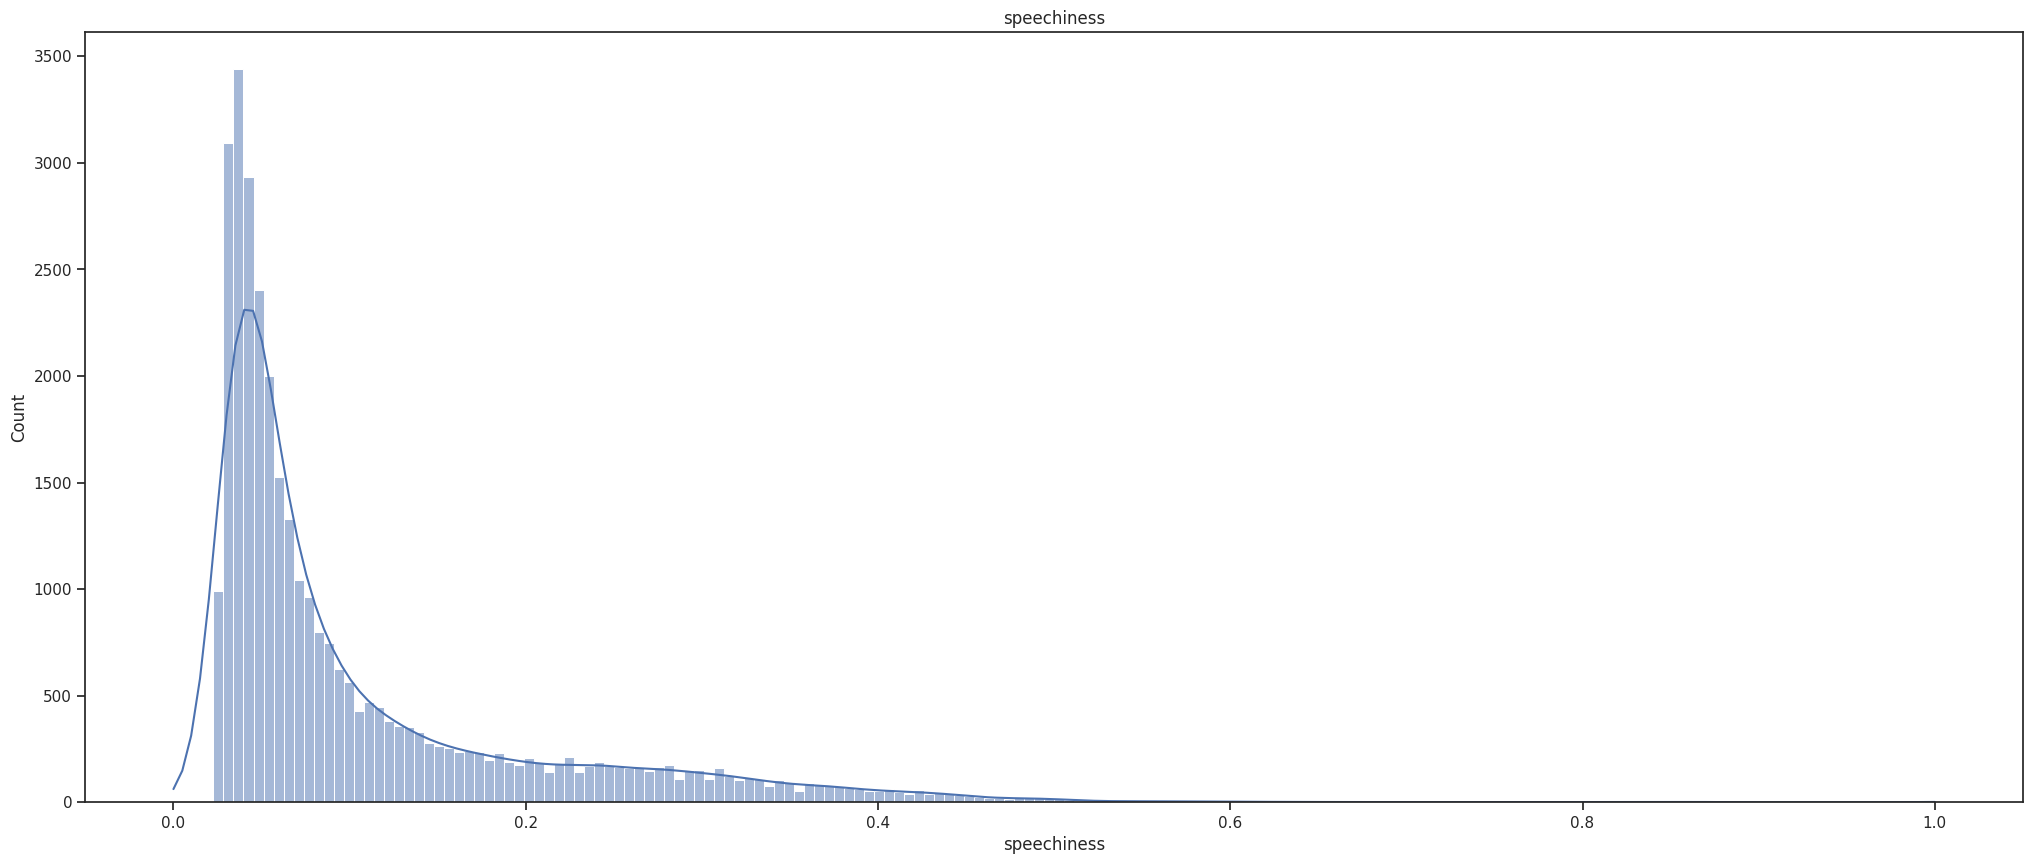

In [67]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['speechiness'], kde=True)
plt.title("speechiness")
plt.show()

**acousticness**

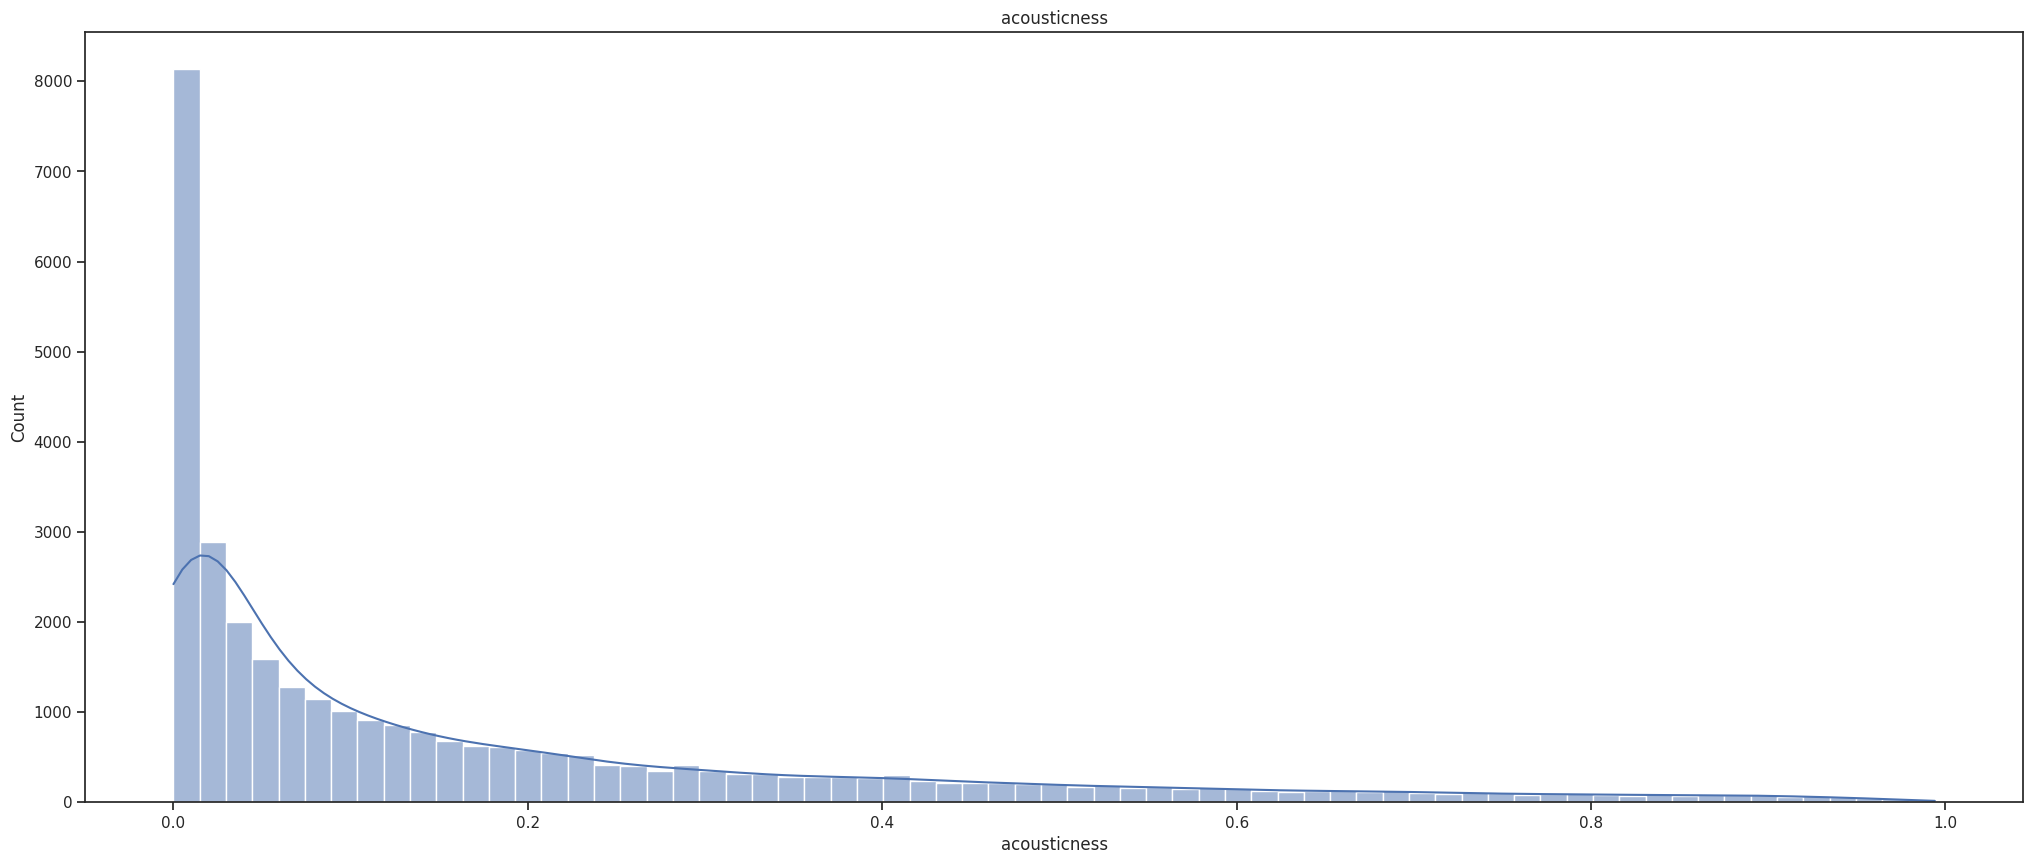

In [68]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['acousticness'], kde=True)
plt.title("acousticness")
plt.show()

**valence**

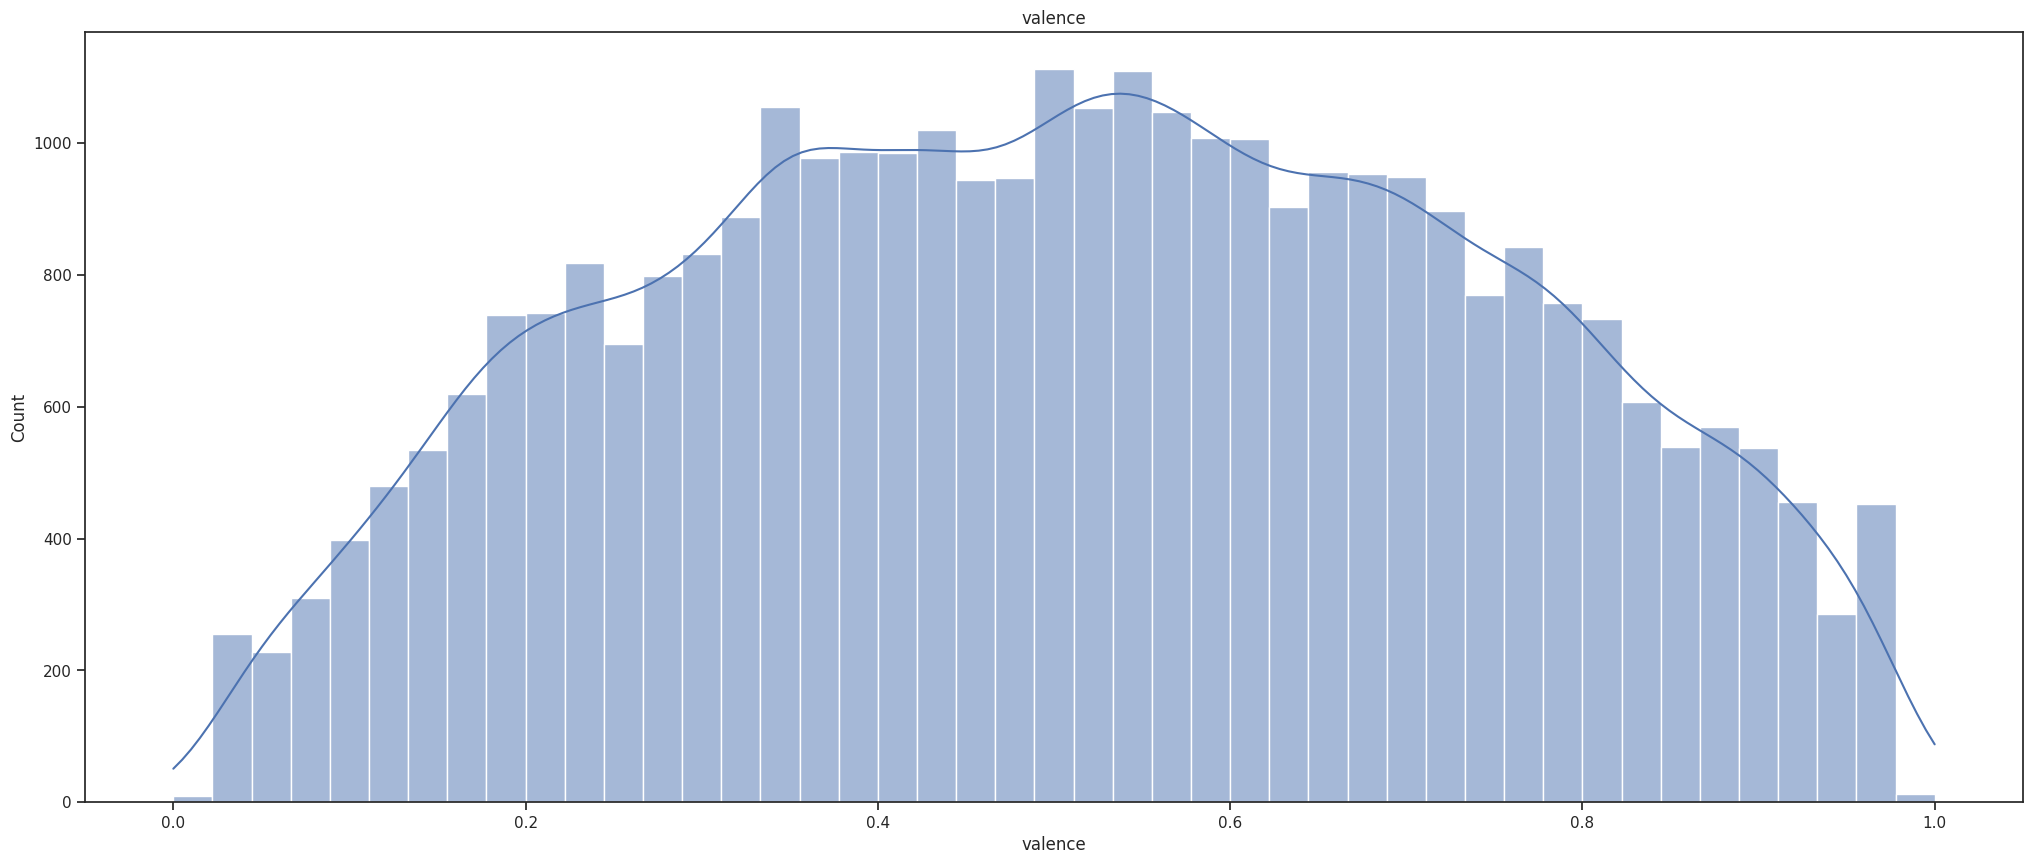

In [69]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['valence'], kde=True)
plt.title("valence")
plt.show()

**liveness**

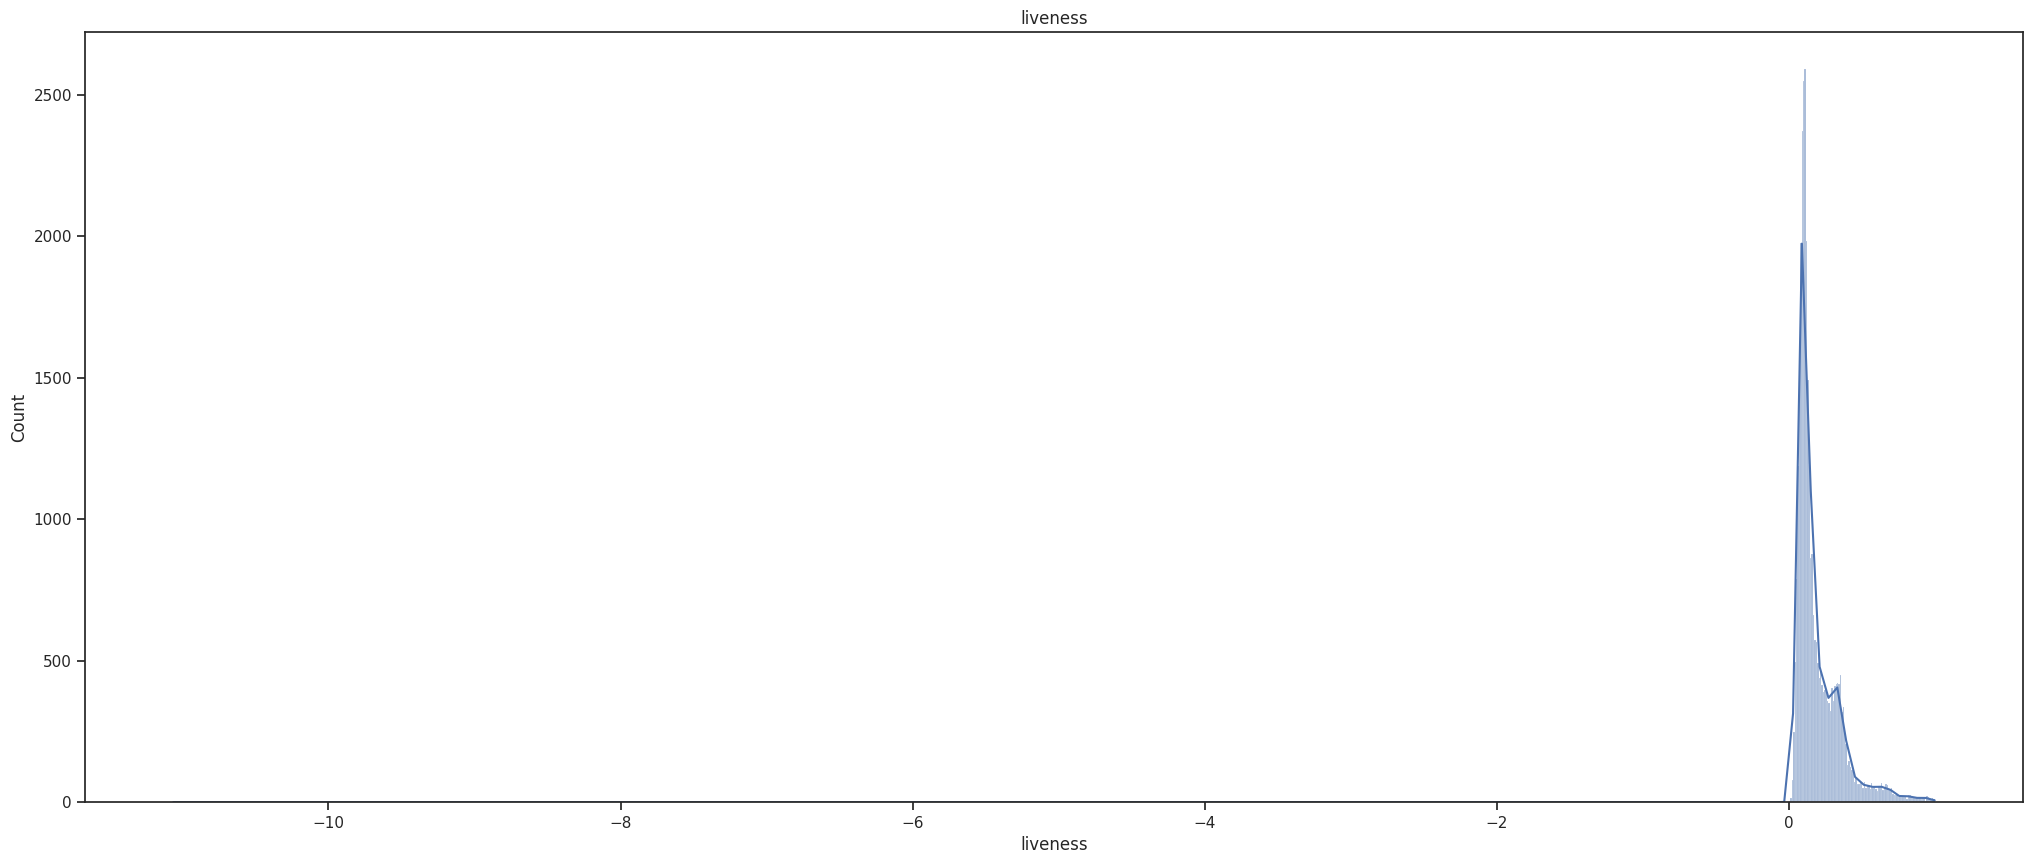

In [70]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['liveness'], kde=True)
plt.title("liveness")
plt.show()

**tempo**

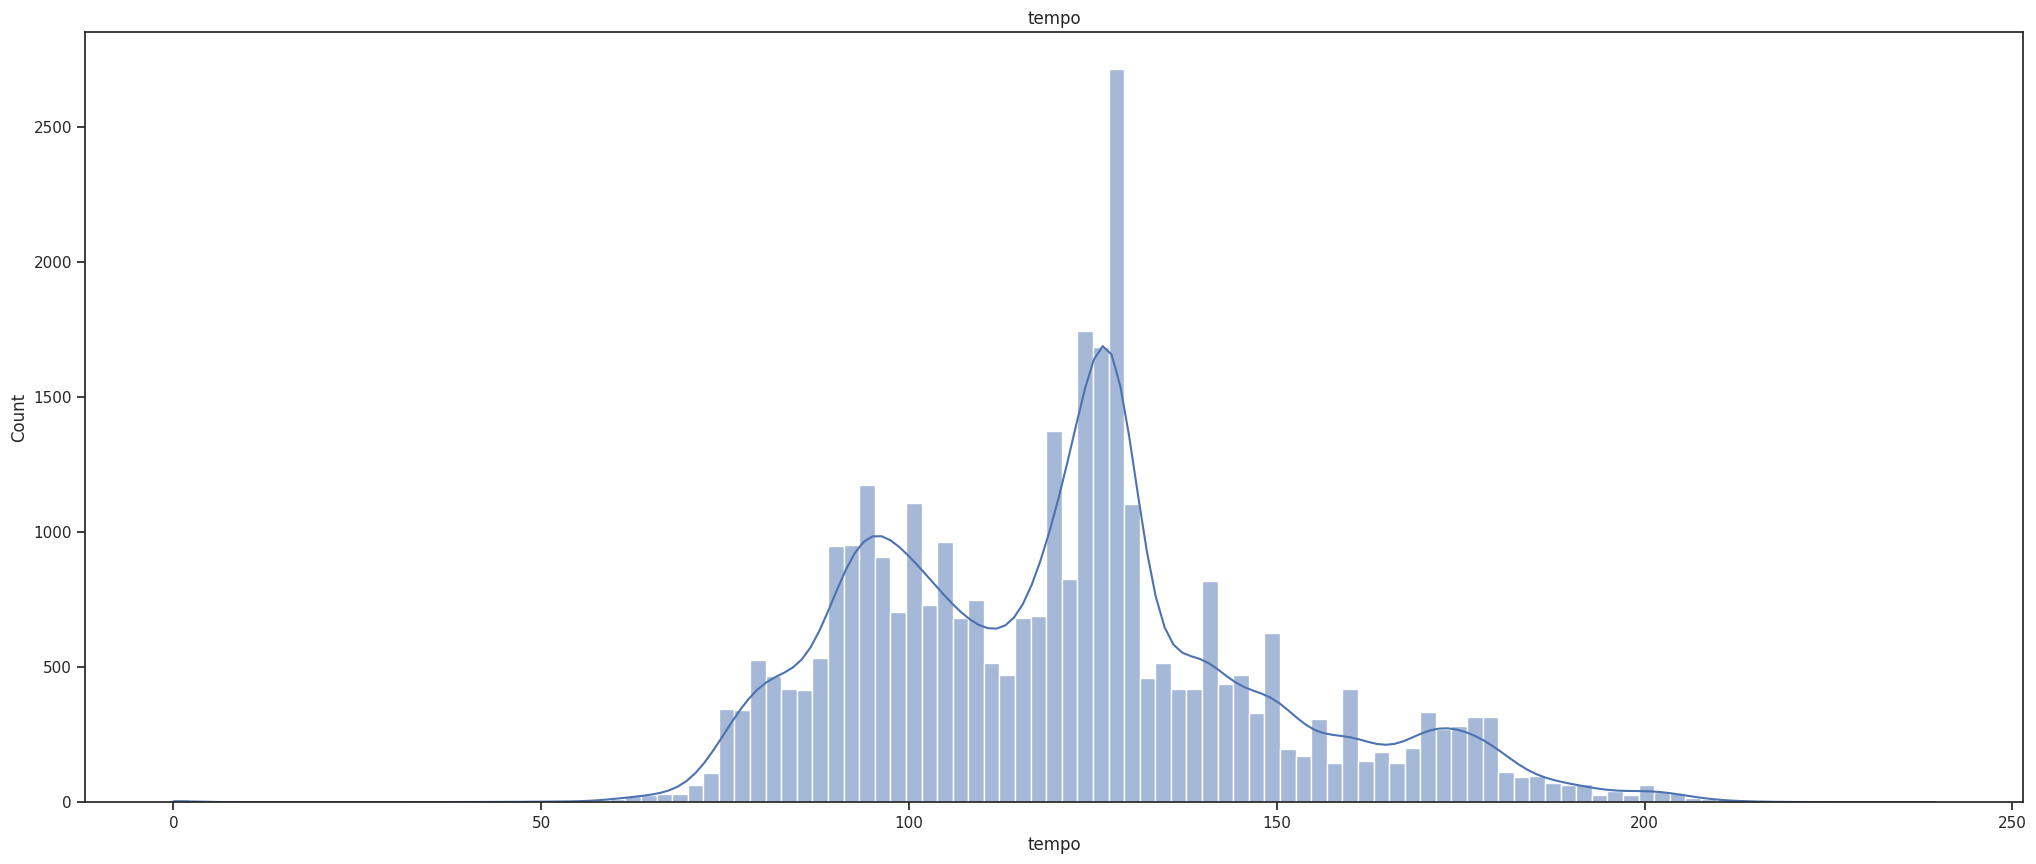

In [71]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['tempo'], kde=True)
plt.title("tempo")
plt.show()

**duration_ms**

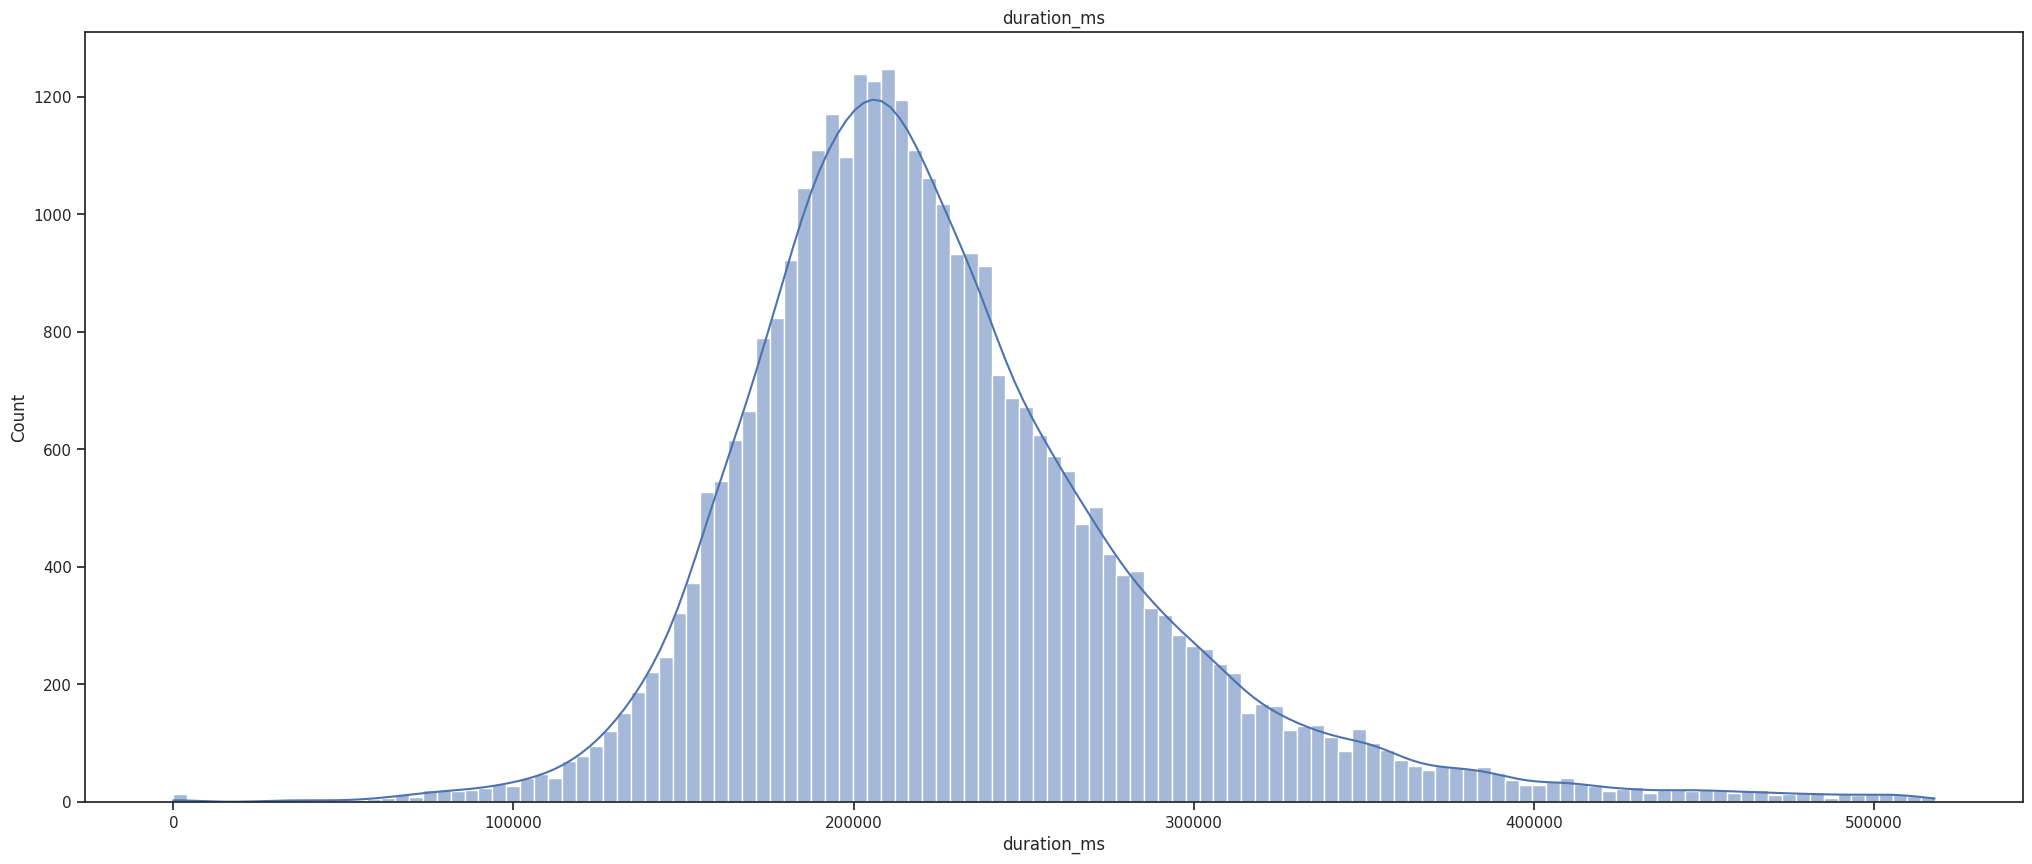

In [72]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['duration_ms'], kde=True)
plt.title("duration_ms")
plt.show()

In [73]:
df.select("track_name", "track_artist", "track_popularity") \
  .orderBy(col("track_popularity").desc()) \
  .show(10, truncate=False)

+---------------+--------------+----------------+
|track_name     |track_artist  |track_popularity|
+---------------+--------------+----------------+
|Dance Monkey   |Tones and I   |100             |
|Dance Monkey   |Tones and I   |100             |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|ROXANNE        |Arizona Zervas|99              |
|Blinding Lights|The Weeknd    |98              |
|Memories       |Maroon 5      |98              |
|The Box        |Roddy Ricch   |98              |
|Tusa           |KAROL G       |98              |
+---------------+--------------+----------------+
only showing top 10 rows



# **PCA**

1. Primeiro vamos selecionar as colunas numericas relevantes para realizacao do PCA.

> OBS: Não usamos key e mode no PCA diretamente porque elas não representam bem uma variação numérica contínua significativa para os componentes principais.

2. vamos aplicar a pca com um número alto de componentes principais para avaliar quanta variancia cada componente explica


In [79]:
print("Colunas numéricas:", numeric_cols)

Colunas numéricas selecionadas: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [84]:
for c in numeric_cols:
    null_count = df.filter(col(c).isNull()).count()
    if null_count > 0:
        print(f"Coluna '{c}' tem {null_count} valores nulos.")

In [85]:
df = df.dropna(subset=numeric_cols)

In [86]:
# VectorAssembler
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
df_vector = assembler.transform(df).select("features")

# StandardScaler para normalizar os dados
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df_vector)
scaled_data = scaler_model.transform(df_vector)

In [87]:
#Aplicacao da pca
pca = PCA(k=len(numeric_cols), inputCol="features", outputCol="pca_features")
pca_model = pca.fit(df_vector)
result = pca_model.transform(df_vector)

# Variância explicada
explained_variance = pca_model.explainedVariance.toArray()
print("Variância explicada por cada componente:")
print(explained_variance)

Variância explicada por cada componente:
[9.99999795e-01 2.02422118e-07 2.44825178e-09 1.75238668e-11
 1.39147223e-11 1.13738378e-11 6.99650130e-12 5.04160289e-12
 2.84280533e-12 2.46794188e-12]


In [92]:
#Variancia acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Variância explicada acumulada por cada componente:")
print(cumulative_variance)

Variância explicada acumulada por cada componente:
[0.9999998 1.        1.        1.        1.        1.        1.
 1.        1.        1.       ]


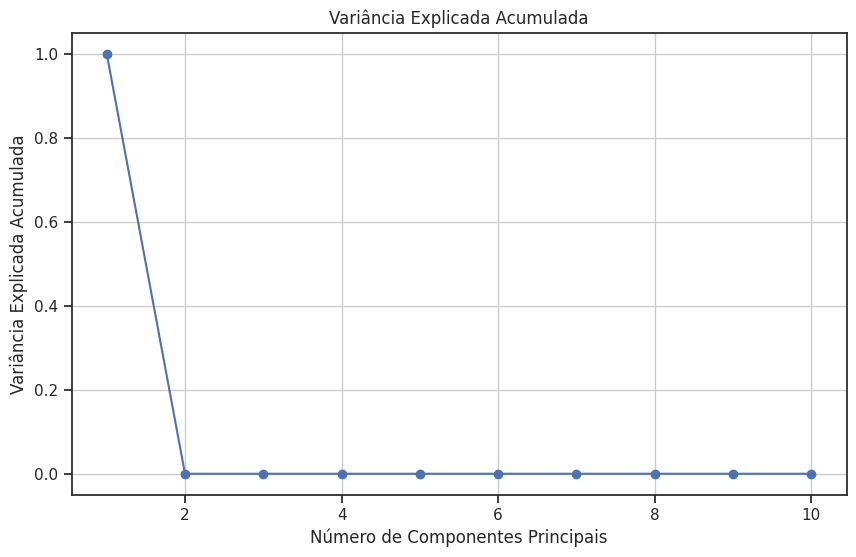

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

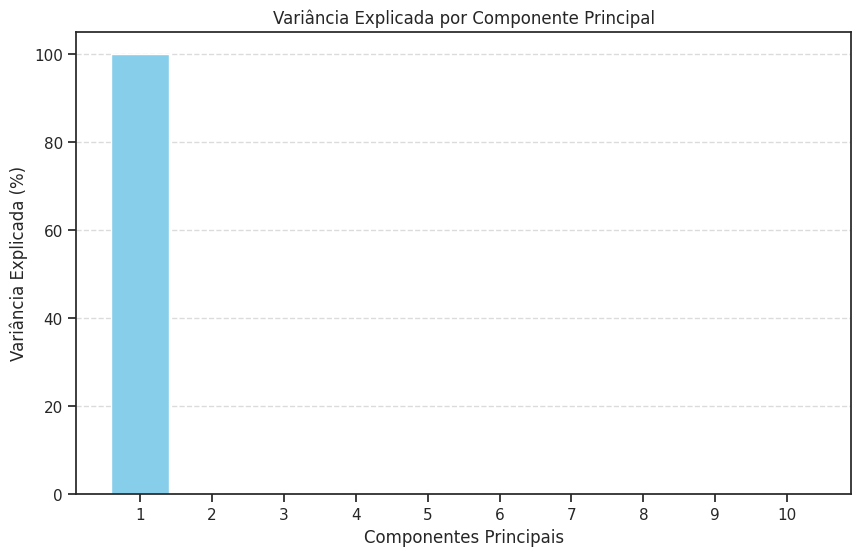

In [90]:
# Número de componentes
num_components = len(explained_variance)

# Eixo x: componentes principais (PC1, PC2, ...)
x = np.arange(1, num_components + 1)

# Plot
plt.figure(figsize=(10,6))
plt.bar(x, explained_variance * 100, color='skyblue')

plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada (%)')
plt.title('Variância Explicada por Componente Principal')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [91]:
#Efeityo das variaveis em cada componente
for i, component in enumerate(pca_model.pc.toArray()):
    print(f"Componente {i+1}:")
    for col_name, weight in zip(numeric_cols, component):
        print(f"{col_name}: {weight:.4f}")
    print("-" * 30)

Componente 1:
danceability: -0.0000
energy: 0.0010
loudness: -0.0016
speechiness: -0.2100
acousticness: -0.1332
instrumentalness: 0.1617
liveness: -0.3563
valence: -0.7553
tempo: 0.1995
duration_ms: 0.4181
------------------------------
Componente 2:
danceability: 0.0000
energy: -0.0010
loudness: -0.0411
speechiness: -0.0082
acousticness: -0.3555
instrumentalness: -0.1389
liveness: 0.2196
valence: 0.3323
tempo: 0.7480
duration_ms: 0.3666
------------------------------
Componente 3:
danceability: -0.0000
energy: -0.0106
loudness: -0.9986
speechiness: 0.0086
acousticness: 0.0278
instrumentalness: 0.0298
liveness: -0.0066
valence: -0.0091
tempo: -0.0239
duration_ms: -0.0127
------------------------------
Componente 4:
danceability: -0.0000
energy: -0.0002
loudness: 0.0001
speechiness: -0.0562
acousticness: 0.0220
instrumentalness: -0.0058
liveness: -0.0052
valence: -0.2882
tempo: 0.5285
duration_ms: -0.7962
------------------------------
Componente 5:
danceability: -0.0000
energy: 0.0009
